## operating cost 與 hk total recycling rate

Model Summary:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.7439      1.201     26.437      0.000      28.905      34.583
GAC_cost_million    -0.0016      0.007     -0.223      0.830      -0.019       0.015

R-squared: 0.0071


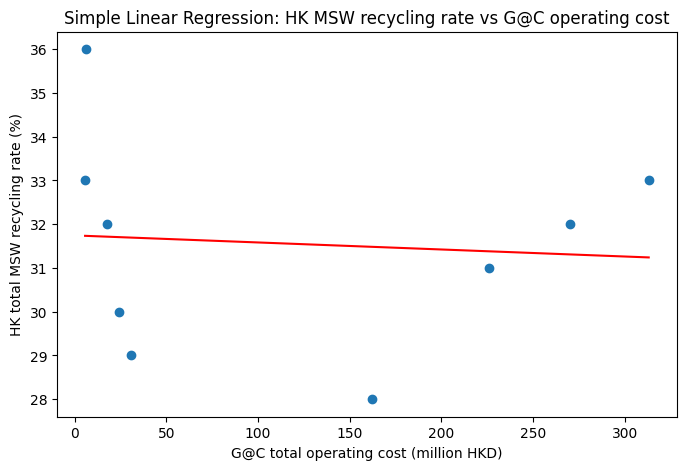

In [3]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset (not directly used for this regression, but kept as in your template)
df = pd.read_excel("../General Stats_G@C_clean.xlsx")
# ----- Prepare data -----
# Raw data copied from the Excel file (only years when G@C cost is available)
gac_cost_hkd = [
    5_730_000,
    6_040_000,
    17_490_000,
    23_970_000,
    31_000_000,
    162_000_000,
    226_000_000,
    270_000_000,
    313_000_000,
]

# Matching HK total MSW recycling rates (%)
# (2015–2023: 33, 36, 32, 30, 29, 28, 31, 32, 33)
recycling_rate_pct = [
    33,
    36,
    32,
    30,
    29,
    28,
    31,
    32,
    33,
]

# Put into a small DataFrame for regression
df_cost = pd.DataFrame({
    "GAC_cost_million": np.array(gac_cost_hkd) / 1_000_000,  # convert to million HKD
    "HK_MSW_recycling_rate": recycling_rate_pct               # percentage values
})

# Prepare X and y
X_cost = df_cost[["GAC_cost_million"]]
y_rate = df_cost["HK_MSW_recycling_rate"]

# ----- Fit model using sklearn for predictions -----
lin_reg_cost = LinearRegression()
lin_reg_cost.fit(X_cost, y_rate)

# ----- Fit model using statsmodels for statistical tests -----
X_cost_sm = sm.add_constant(X_cost)  # Add constant term for intercept
model_cost = sm.OLS(y_rate, X_cost_sm)
results_cost = model_cost.fit()

# Predictions for plotting
y_pred_cost = lin_reg_cost.predict(X_cost)

print("Model Summary:")
print(results_cost.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_cost.rsquared:.4f}")

# ----- Plot -----
plt.figure(figsize=(8, 5))
plt.scatter(X_cost, y_rate)
plt.plot(X_cost, y_pred_cost, color='red')
plt.xlabel('G@C total operating cost (million HKD)')
plt.ylabel('HK total MSW recycling rate (%)')
plt.title('Simple Linear Regression: HK MSW recycling rate vs G@C operating cost')
plt.show()



**Operating-cost coefficient ($\hat \beta_1$) ≈ −0.0016 (p ≈ 0.83 > 0.05)**  

- There is **no statistically significant association** between G@C total operating cost and Hong Kong’s overall MSW recycling rate in this sample.  

- Changes in G@C operating cost **explain only a very small proportion** of the variance in the HK total MSW recycling rate **(R² ≈ 0.007)**, meaning other factors are likely much more important in driving changes in the overall recycling rate.
